In [1]:
# importação das bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# lendo o arquivo diabetes

df = pd.read_csv("diabetes.csv", sep=',')

In [5]:
# exibindo os 5

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# informações acerca do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# descrição de cada coluna

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


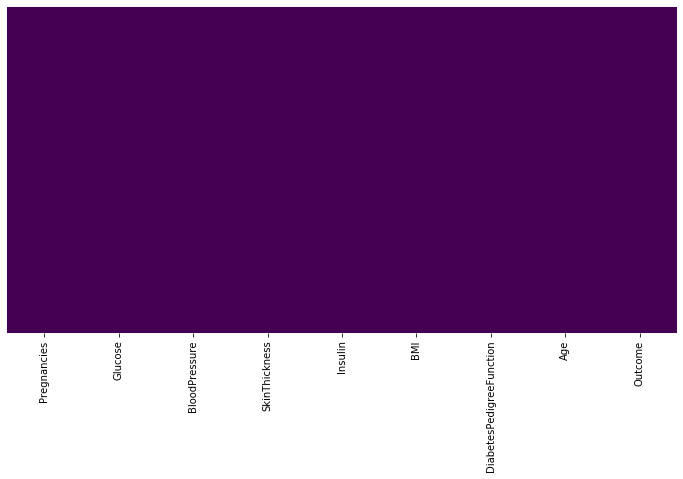

In [13]:
# visualização de dados faltantes

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

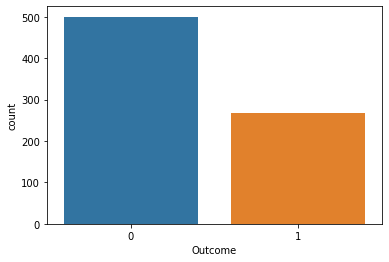

In [16]:
# quantidade de pessoas que tem (1) e não tem diabetes (0)

sns.countplot(x='Outcome', data=df)

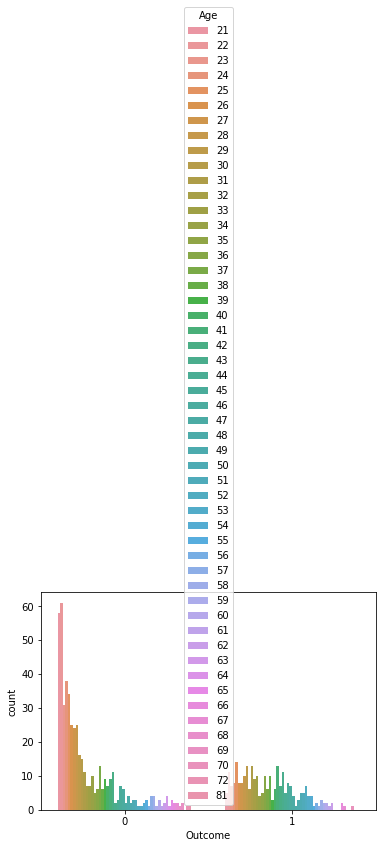

In [18]:
 # quantidade de pessoas que tem (1) e não tem diabetes (0) a partir da idade

sns.countplot(x='Outcome', data=df, hue='Age')

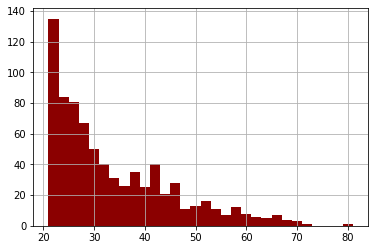

In [19]:
# histograma acerca da idade

df['Age'].hist(bins=30, color='darkred', alpha=1)

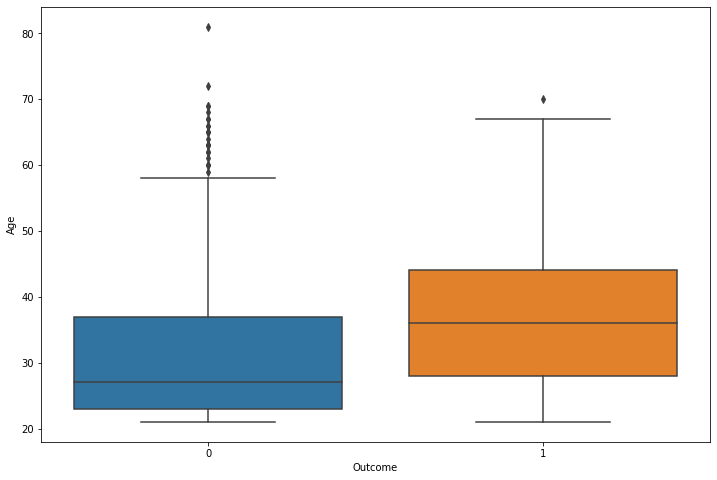

In [21]:
# Visualizar distribuição de idade de quem tem e não tem diabetes

plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome',y='Age',data=df)

In [22]:
# importar a regressão logistica

from sklearn.linear_model import LogisticRegression

In [23]:
# quebrar os dados em dados de treino e teste

from sklearn.model_selection import train_test_split

In [25]:
# definindo x de treino e y de teste

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.3)

In [26]:
# instancia a classe LogisticRegression para fitar o modelo

logmodel = LogisticRegression()

In [27]:
# fitando o modelo

logmodel.fit(X_train, y_train)

C:\Users\morph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# predizer os inputs de teste e calculas os valores que o modelo ta dizendo que é verdade

prediction = logmodel.predict(X_test)

In [29]:
# verificar se o modelo é bom

from sklearn.metrics import classification_report

In [30]:
# resultado final do modelo

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       158
           1       0.73      0.60      0.66        73

    accuracy                           0.81       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231

